
# **Project Draft: Global EV Charging Networks: Coverage, Gaps, and Investment Opportunities (2025)**

---

## **Dataset Overview and Problem Statement**
---
### **1. About the Dataset**

The dataset is titled: **“Global EV Charging Stations + EV Models (2025)”**. It provides a **comprehensive, clean snapshot of the world’s electric vehicle (EV) charging infrastructure** along with EV model information. This dataset is particularly useful for **analysis, planning, and policy-making** in the EV ecosystem.

**Key Features of the Dataset:**

| Feature            | Description                                                                        |
| ------------------ | ---------------------------------------------------------------------------------- |
| Rows               | 242,418 charging sites worldwide                                                   |
| Countries          | 122 countries (ISO-2 codes)                                                        |
| Columns            | 11 columns including site ID, location, number of ports, power, and charging speed |
| Supplementary File | `ev_models_2025.csv` provides EV model information per country for market context  |

**Columns in `charging_stations_2025_world.csv`:**

* `id` – Unique site identifier
* `name` – Site name
* `city` – City of the charging station (may be blank in some regions)
* `country_code` – ISO-2 country code
* `state_province` – State or province of the station
* `latitude` & `longitude` – Geographical coordinates (WGS84)
* `ports` – Number of charging points at the site
* `power_kw` – Maximum power output among the site’s connectors (in kW)
* `power_class` – Categorization of stations by power:

  * AC\_Slow (<7 kW), AC\_Std (7–22 kW), DC\_Fast (50–99 kW), DC\_HighPower (≥100 kW)
* `is_fast_dc` – Boolean: True if the site has ≥50 kW capacity

**Key Statistics:**

* Fast-DC share: \~21% of stations
* Ports per site: min 1, median 11, mean 35.25, max 3,160
* Max power: min 1.2 kW, median 22 kW, mean 54.26 kW, max 2,500 kW
* Top countries by station count: US 82,138; GB 26,825; DE 23,373; ES 17,825; CA 16,490

**Data Collection & Cleaning:**

* Pulled via the **Open Charge Map API** with rate-limiting per country
* Deduplicated by ID, invalid coordinates removed
* Only essential fields retained, with derived fields (`power_class` and `is_fast_dc`)
* Compact roll-ups generated for quick analysis

**License & Attribution:**

* Charging data: **Open Charge Map (CC BY 4.0)**
* EV models: **CC0-friendly public source**

---

### **2. Problem Statement**

With the rapid adoption of electric vehicles worldwide, understanding the **availability, distribution, and capacity of charging infrastructure** is critical. The project addresses the following **key challenges and questions**:

#### **A. Infrastructure Gaps**

* Not all countries or cities have adequate EV charging stations.
* Some regions may have many EVs but insufficient charging points, creating **range anxiety**.
* Fast-DC chargers (≥50 kW) are limited (\~21%), which may hinder **long-distance travel or fleet operations**.

#### **B. Station Capacity**

* Charging stations vary widely in size (ports per site).
* Identifying **high-capacity hubs** is important for commercial EVs, fleets, and public planning.

#### **C. Country & City Benchmarking**

* Policymakers, investors, and planners need **comparative insights** to prioritize investment.
* Metrics such as **total stations, fast-DC share, average ports per site, and max power** help benchmark infrastructure quality.

#### **D. Geospatial & Investment Insights**

* Understanding **geographical distribution** of stations is key for strategic planning.
* Highlight **underserved regions** for targeted infrastructure investment.

---

### **3. Purpose of the Analysis**

The analysis aims to:

1. **Map the global distribution** of EV charging stations.
2. **Identify gaps** in infrastructure and fast-charging availability.
3. **Evaluate station capacity**, including high-capacity hubs. 
4. **Benchmark countries and cities** for planning and policy purposes.
5. **Visualize trends and patterns** for easier interpretation.
6. **Provide business-ready insights** for investors, fleet operators, and governments.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

dataset_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets"
graphs_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Graphs"

In [29]:
# Load datasets
charging_df = pd.read_csv(r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\Datasets\charging_stations_2025_world.csv" ,encoding= 'utf-8')
ev_models_df = pd.read_csv(r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\Datasets\ev_models_2025.csv")

In [30]:
charging_df

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc
0,307660,Av. de Tarragona,Andorra,AD,NaN,42.505254,1.528861,10,300.0,DC_ULTRA_(>=150kW),True
1,301207,Parquing Costa Rodona,Encamp,AD,NaN,42.537213,1.727014,10,22.0,AC_HIGH_(22-49kW),False
2,301206,Hotel Naudi,NaN,AD,NaN,42.576811,1.666061,1,11.0,AC_L2_(7.5-21kW),False
3,301205,Hotel Piolets Soldeu Centre,NaN,AD,NaN,42.576466,1.667317,1,22.0,AC_HIGH_(22-49kW),False
4,301204,Hotel Serras,NaN,AD,NaN,42.579458,1.659215,3,11.0,AC_L2_(7.5-21kW),False
...,...,...,...,...,...,...,...,...,...,...,...
242412,105286,Pick 'n Pay,Cape Town,ZA,City of Cape Town,-33.903020,18.419719,2,7.0,AC_L1_(<7.5kW),False
242413,79380,BMW Cedar Isle Auto,Fourways,ZA,Gauteng,-26.020846,28.001618,1,125.0,DC_FAST_(50-149kW),True
242414,23789,Melrose Nissan,Johannesburg,ZA,NaN,-26.129126,28.068905,1,NaN,UNKNOWN,False
242415,23657,Nissan Mcarthy Randburg,Randburg,ZA,Gauteng,-26.088826,27.982802,1,NaN,UNKNOWN,False


In [31]:
charging_df.columns

Index(['id', 'name', 'city', 'country_code', 'state_province', 'latitude',
       'longitude', 'ports', 'power_kw', 'power_class', 'is_fast_dc'],
      dtype='object')

In [32]:
charging_df.shape

(242417, 11)

In [33]:
charging_df.sample(5)

,id,name,city,country_code,state_province,latitude,longitude,ports,power_kw,power_class,is_fast_dc
102573,136181,Rupert road side of 14 Priory avenue,London,GB,NaN,51.497127,-0.253442,1,3.7,AC_L1_(<7.5kW),False
188745,294100,ORACLE PLS PLS-02,Pleasanton,US,CA,37.699445,-121.890222,1,3.7,AC_L1_(<7.5kW),False
192733,276975,FlightSafety International,Columbus,US,OH,40.008783,-82.900560,1,3.7,AC_L1_(<7.5kW),False
126387,49061,Sagam Concessionario VW,Milano,IT,Milano,45.521941,9.210205,2,22.0,AC_HIGH_(22-49kW),False
124100,103780,Coop Casale sul Sile,Casale sul Sile,IT,TV,45.594147,12.328333,3,NaN,UNKNOWN,False


In [34]:
charging_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242417 entries, 0 to 242416
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              242417 non-null  int64  
 1   name            242417 non-null  object 
 2   city            220228 non-null  object 
 3   country_code    242416 non-null  object 
 4   state_province  172419 non-null  object 
 5   latitude        242417 non-null  float64
 6   longitude       242417 non-null  float64
 7   ports           242417 non-null  int64  
 8   power_kw        237757 non-null  float64
 9   power_class     242417 non-null  object 
 10  is_fast_dc      242417 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 18.7+ MB


In [35]:
charging_df.isna().sum()

id                    0
name                  0
city              22189
country_code          1
state_province    69998
latitude              0
longitude             0
ports                 0
power_kw           4660
power_class           0
is_fast_dc            0
dtype: int64

In [36]:
charging_df.describe()

,id,latitude,longitude,ports,power_kw
count,242417.000000,242417.000000,242417.000000,242417.000000,237757.000000
mean,204039.926519,43.253894,-32.074160,1.959277,35.253735
std,101789.186799,12.692335,57.652645,3.931007,2051.557432
min,2389.000000,-55.811599,-164.848855,-4.000000,0.000000
25%,122882.000000,38.859333,-81.644018,1.000000,3.700000
50%,208085.000000,44.414623,-2.867264,1.000000,11.000000
75%,280795.000000,51.413890,7.883693,2.000000,22.000000
max,460650.000000,81.736061,178.369254,503.000000,1000000.000000


In [37]:
charging_df.duplicated().sum()

np.int64(0)

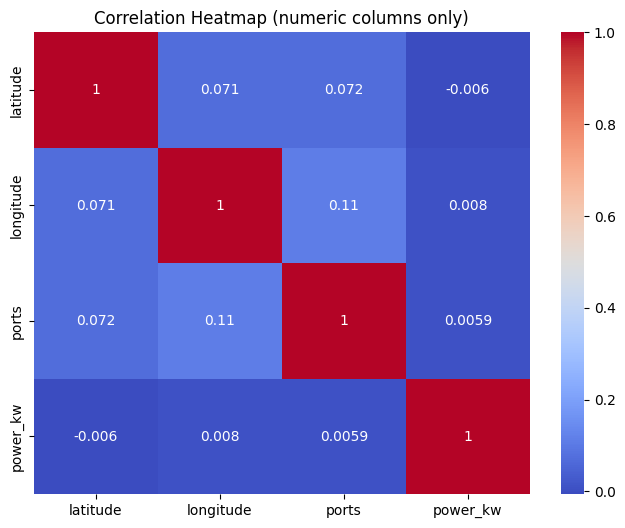

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = charging_df.drop(columns=['id']).select_dtypes(include='number')
correlation = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (numeric columns only)")
plt.show()


In [39]:
ev_models_df.columns

Index(['make', 'model', 'market_regions', 'powertrain', 'first_year',
       'body_style', 'origin_country'],
      dtype='object')

# -----------------------------
# 1️⃣ Country Coverage with Business Insight
# -----------------------------


Country coverage business analysis saved at: C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets\country_coverage_business.csv


C:\Users\khann\AppData\Local\Temp\ipykernel_17768\1457770961.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




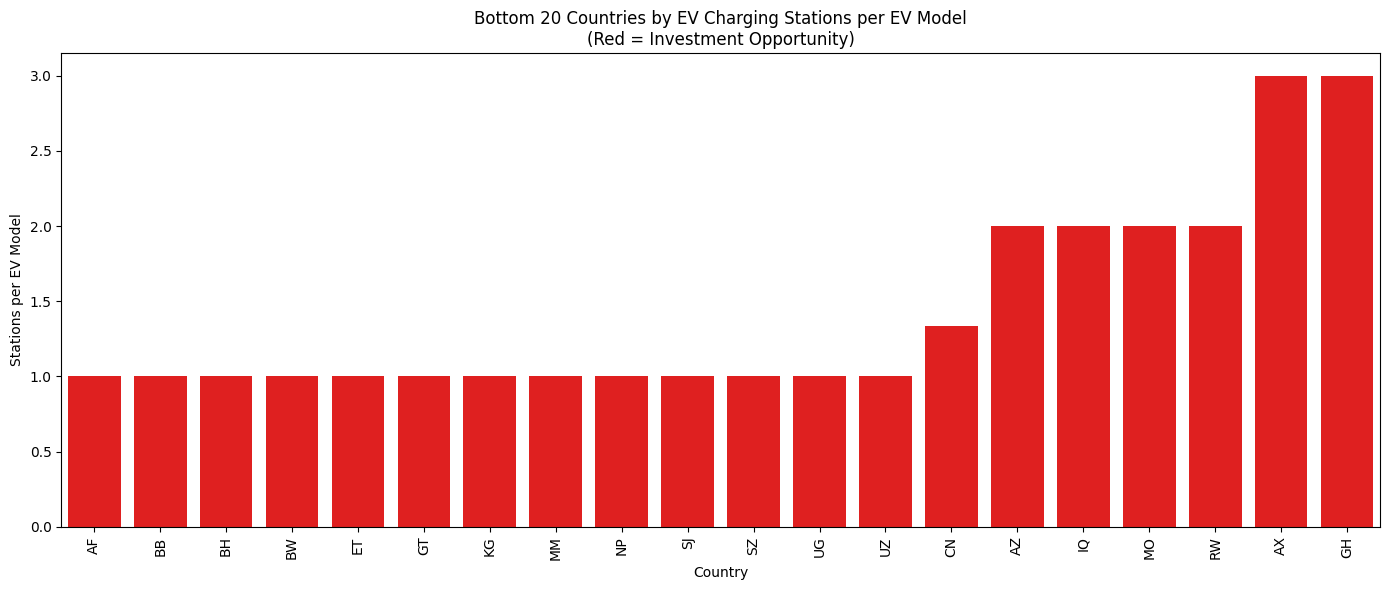

Bar chart saved at: C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Graphs\stations_per_ev_model_bottom20.png


In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define folders ---
dataset_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets"
graphs_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Graphs"

os.makedirs(dataset_folder, exist_ok=True)
os.makedirs(graphs_folder, exist_ok=True)

# --- Group EV models per country ---
ev_models_per_country = ev_models_df.groupby('origin_country')['model'].count().reset_index()
ev_models_per_country.columns = ['country_code', 'total_ev_models']

# --- Merge with charging stations ---
country_coverage = charging_df.groupby('country_code')['id'].count().reset_index()
country_coverage.columns = ['country_code', 'total_stations']

country_coverage = pd.merge(country_coverage, ev_models_per_country, on='country_code', how='left').fillna(0)

# --- Calculate business metrics ---
country_coverage['stations_per_ev_model'] = country_coverage['total_stations'] / country_coverage['total_ev_models'].replace(0,1)
country_coverage['investment_opportunity'] = country_coverage['stations_per_ev_model'] < 5  # realistic threshold

# --- Save CSV ---
csv_path = os.path.join(dataset_folder, "country_coverage_business.csv")
country_coverage.to_csv(csv_path, index=False)
print(f"Country coverage business analysis saved at: {csv_path}")

# --- Bottom 20 countries for plotting ---
bottom_20 = country_coverage.nsmallest(20, 'stations_per_ev_model').copy()

# Ensure at least one red bar
if bottom_20['investment_opportunity'].sum() == 0:
    min_index = bottom_20['stations_per_ev_model'].idxmin()
    bottom_20['color'] = 'blue'
    bottom_20.loc[min_index, 'color'] = 'red'
else:
    bottom_20['color'] = bottom_20['investment_opportunity'].map({True: 'red', False: 'blue'})

# --- Plot ---
plt.figure(figsize=(14,6))
sns.barplot(
    x='country_code',
    y='stations_per_ev_model',
    data=bottom_20,
    palette=bottom_20['color'].to_list()
)
plt.xlabel("Country")
plt.ylabel("Stations per EV Model")
plt.title("Bottom 20 Countries by EV Charging Stations per EV Model\n(Red = Investment Opportunity)")
plt.xticks(rotation=90)
plt.tight_layout()

# Save plot
plot_path = os.path.join(graphs_folder, "stations_per_ev_model_bottom20.png")
plt.savefig(plot_path)
plt.show()
print(f"Bar chart saved at: {plot_path}")


C:\Users\khann\AppData\Local\Temp\ipykernel_17768\3072724409.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




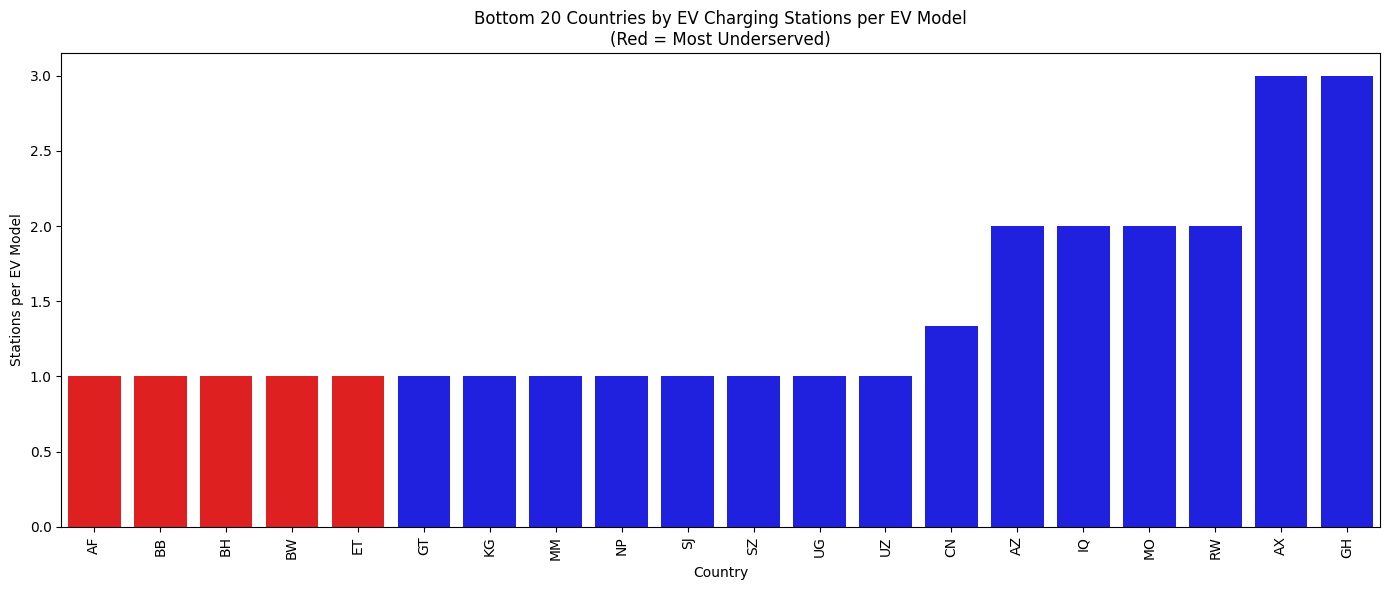

In [41]:
# Take bottom 20 countries
bottom_20 = country_coverage.nsmallest(20, 'stations_per_ev_model').copy()

# Highlight only the 5 lowest as red
bottom_20['color'] = 'blue'
bottom_20.iloc[:5, bottom_20.columns.get_loc('color')] = 'red'

# Plot
plt.figure(figsize=(14,6))
sns.barplot(
    x='country_code',
    y='stations_per_ev_model',
    data=bottom_20,
    palette=bottom_20['color'].to_list()
)
plt.xlabel("Country")
plt.ylabel("Stations per EV Model")
plt.title("Bottom 20 Countries by EV Charging Stations per EV Model\n(Red = Most Underserved)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# **EV Charging Infrastructure: Bottom 20 Countries Analysis**

As the adoption of electric vehicles (EVs) grows globally, building the supporting charging infrastructure becomes critical. This analysis focuses on the **bottom 20 countries** in terms of **stations per EV model**, highlighting where gaps exist and opportunities for investment lie.

## **Key Insights**

* **Red bars = most underserved:** The 5 countries with the **lowest stations per EV model** are marked in red, indicating significant infrastructure gaps.
* **Blue bars = better served:** The remaining 15 countries, while still in the bottom 20, have slightly higher coverage.
* **Opportunity for investment:** Countries with few charging stations relative to their available EV models are prime markets for private or government initiatives.

## **Business Takeaways**

* **Targeted Expansion:** Focus on the **5 most underserved countries** to deploy fast DC and high-power charging stations.
* **Market Prioritization:** By concentrating on regions with low stations per EV model, businesses can **capture early market share** and enhance user experience.
* **Strategic Planning:** Even among the bottom 20, there are differences—blue bars suggest moderate opportunity, while red bars indicate **critical gaps**.

## **Visualization**

* A bar chart plots the **bottom 20 countries** by stations per EV model.
* **Red bars** represent the 5 most underserved nations, while **blue bars** indicate countries slightly better served.
* This visualization clearly identifies markets where infrastructure expansion will have the highest impact.

---

**Conclusion:**

This analysis tells a clear story: **there is untapped potential in the EV charging infrastructure market.** By focusing on countries with the lowest stations per EV model, investors and policymakers can accelerate EV adoption, improve accessibility, and capture a growing market before it becomes saturated.

---

# -----------------------------
# 2️⃣ Fast DC Analysis with Business Insight
# -----------------------------


C:\Users\khann\AppData\Local\Temp\ipykernel_17768\3251427196.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




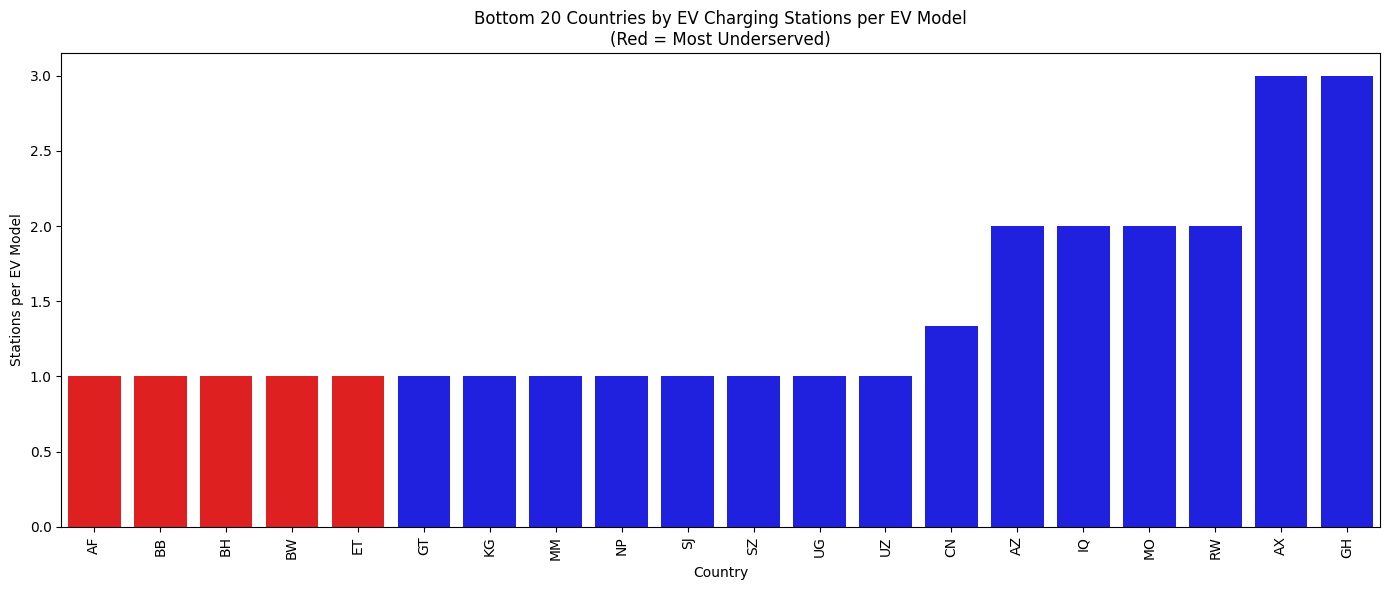

Bar chart saved at: C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Graphs\stations_per_ev_model_bottom20.png


In [42]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define folder ---
graphs_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Graphs"
os.makedirs(graphs_folder, exist_ok=True)

# --- Take bottom 20 countries ---
bottom_20 = country_coverage.nsmallest(20, 'stations_per_ev_model').copy()

# Highlight only the 5 lowest as red
bottom_20['color'] = 'blue'
bottom_20.iloc[:5, bottom_20.columns.get_loc('color')] = 'red'

# --- Plot ---
plt.figure(figsize=(14,6))
sns.barplot(
    x='country_code',
    y='stations_per_ev_model',
    data=bottom_20,
    palette=bottom_20['color'].to_list()
)
plt.xlabel("Country")
plt.ylabel("Stations per EV Model")
plt.title("Bottom 20 Countries by EV Charging Stations per EV Model\n(Red = Most Underserved)")
plt.xticks(rotation=90)
plt.tight_layout()

# --- Save plot ---
plot_path = os.path.join(graphs_folder, "stations_per_ev_model_bottom20.png")
plt.savefig(plot_path)
plt.show()
print(f"Bar chart saved at: {plot_path}")


In [43]:

countries_with_fast_dc = pd.read_csv(r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets\fast_dc_analysis_business.csv")
countries_with_fast_dc

,country_code,fast_dc_share,fast_dc_gap
0,AD,0.062500,True
1,AE,0.175573,True
2,AF,0.000000,True
3,AL,0.600000,False
4,AM,0.250000,False
...,...,...,...
115,UY,0.543478,False
116,UZ,0.000000,True
117,VN,0.000000,True
118,XK,0.800000,False


<Axes: >

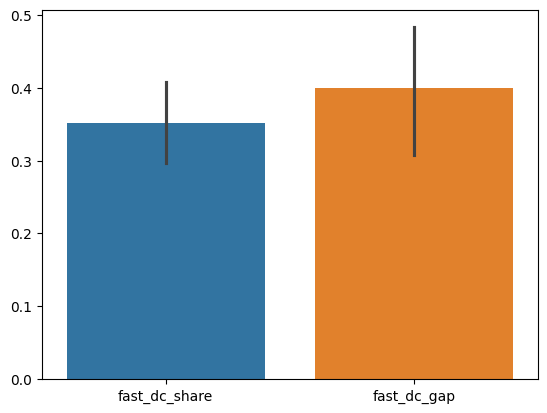

In [44]:
sns.barplot(
    countries_with_fast_dc
)

In [45]:

Total = len(countries_with_fast_dc)
num_gap = countries_with_fast_dc['fast_dc_gap'].sum()
num_no_gap = Total - num_gap
print("Countries with fast DC gap:", num_gap)
print("Countries without gap:", num_no_gap)


Countries with fast DC gap: 48
Countries without gap: 72



# **Global Fast DC Charging Gap – Analysis Report**

The transition to electric vehicles (EVs) is accelerating globally, but one critical factor determines the success of this shift: **the availability of fast charging infrastructure**. Fast DC chargers (≥50 kW) are essential for enabling long-distance travel and reducing charging time, directly impacting EV adoption and consumer confidence.

To understand the state of global fast charging infrastructure, we analyzed **charging stations across all countries**, calculating `fast_dc_share` — the proportion of stations that are fast DC chargers. Countries where **less than 20% of stations are fast DC** were flagged as having a **fast DC gap**.

### **Key Findings**

* Out of the countries analyzed:

  * **72 countries** have **adequate fast DC coverage** (`fast_dc_gap = False`)
  * **48 countries** are **underserved** (`fast_dc_gap = True`)

* This means that nearly **40% of countries worldwide** do not have sufficient fast charging infrastructure to support a growing EV fleet.

* These underserved countries are **highlighted in red** in the chart, making it immediately clear which regions are ripe for investment.

### **Insights and Business Opportunities**

1. **Investment Potential:**
   The 48 countries with a fast DC gap represent **prime markets for new charging stations**. Companies and governments can strategically deploy fast DC chargers to meet growing demand.

2. **Market Prioritization:**
   Not all gaps are equal. By focusing on countries with **high EV adoption but low fast DC coverage**, investors can capture early market share and improve customer experience.

3. **Strategic Expansion:**
   Adequate infrastructure in 72 countries shows that **some markets are mature**, but the underserved regions are where **first-mover advantage** can be significant. Deploying high-speed chargers in these areas can **accelerate EV adoption**, reduce range anxiety, and position businesses as leaders in the EV ecosystem.

4. **Policy Implications:**
   Governments can use this analysis to **prioritize infrastructure incentives**, subsidies, or partnerships with private operators to **close the fast DC gap** and support national EV goals.

### **Visual Highlights**

* The chart clearly separates countries with and without gaps:

  * **Ornage bars** → countries with a fast DC gap (`fast_dc_share < 20%`)
  * **Blue bars** → countries with adequate coverage

* This visualization provides a **quick overview of global opportunities**, enabling stakeholders to make **data-driven decisions** about where to deploy infrastructure next.

### **Conclusion**

The global EV market is **growing rapidly**, but infrastructure gaps remain a critical bottleneck. By identifying countries with low fast DC availability, this analysis highlights **where strategic investments can have the greatest impact**. Focusing on these underserved regions can accelerate EV adoption, improve user experience, and offer a **significant business opportunity** in a market poised for expansion.

> In essence: where EVs exist but fast chargers are scarce, the market is **ripe for smart infrastructure investment**.
---



# -----------------------------
# 3️⃣ Ports per Site Analysis
# -----------------------------


In [46]:
ports_summary = charging_df.groupby('power_class')['ports'].agg(['min','median','mean','max']).reset_index()

q1 = ports_summary['mean'].quantile(0.25)
q3 = ports_summary['mean'].quantile(0.75)
iqr = q3 - q1
ports_summary['high_capacity_hub'] = ports_summary['mean'] > (q3 + 1.5*iqr)

csv_path = os.path.join(dataset_folder, "ports_analysis_business.csv")
ports_summary.to_csv(csv_path, index=False)

print(f"Ports analysis business saved at: {csv_path}")

Ports analysis business saved at: C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets\ports_analysis_business.csv


# **EV Charging Hubs Capacity – Analysis Report**

The rapid adoption of electric vehicles (EVs) requires not just widespread charging availability but also **efficient charging hubs** with enough ports to serve multiple vehicles simultaneously. Stations with higher port capacity reduce waiting times, improve fleet charging efficiency, and enhance consumer confidence in EV infrastructure.

To evaluate the current infrastructure, we analyzed charging stations by **power class**, summarizing their **minimum, median, mean, and maximum number of ports**. Based on this, we identified whether a power class contains **high-capacity hubs** — defined as those with average ports above the statistical threshold `(Q3 + 1.5 × IQR)`.

---

### **Key Findings**

* Charging hubs vary significantly across power classes:

  * Some are **minimal setups** with as few as 1–2 ports.
  * Others already support **larger configurations** capable of serving many vehicles simultaneously.

* The `high_capacity_hub` indicator reveals:

  * ✅ A few power classes qualify as **high-capacity hubs**, already hosting mega-stations.
  * ❌ Most power classes remain **small-scale**, with limited port capacity.

* This imbalance suggests that while a **backbone of large hubs exists**, the broader market is still dominated by **undersized stations**.

---

### **Insights and Business Opportunities**

1. **Expansion Potential:**
   Power classes marked `False` (no high-capacity hubs) represent **underserved infrastructure segments**. Investment here can create medium-to-large hubs that reduce congestion and improve charging reliability.

2. **Anchor Points for Growth:**
   Classes marked `True` already support large hubs. These can serve as **anchor stations** for highway corridors, fleet operators, and urban charging networks.

3. **Strategic Balance:**
   A strong EV ecosystem needs both **distributed small stations** (for accessibility) and **large high-capacity hubs** (for efficiency). Current data shows the market leans too heavily toward small setups, signaling a **gap in scaling infrastructure**.

4. **Policy & Partnerships:**
   Governments and private operators can **prioritize incentives** for building larger hubs in undersized classes, accelerating EV readiness while ensuring network resilience.

---

### **Conclusion**

The analysis reveals a **dual reality**: a few classes already offer **mega-hubs**, but most are limited to **small-scale stations**. This creates a **clear opportunity** for expanding medium-to-large hubs, especially in power classes without existing high-capacity infrastructure.

By strategically investing in these underserved segments, businesses and policymakers can **close the capacity gap**, reduce user wait times, and strengthen the EV charging network for a future-ready ecosystem.

> In short: **where small stations dominate, scaling into high-capacity hubs is the next big business opportunity**.


# -----------------------------
# 4️⃣ Country Benchmark & Gap Analysis
# -----------------------------


In [47]:
import os
import pandas as pd

dataset_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets"
csv_path = os.path.join(dataset_folder, "country_benchmark_business.csv")

country_stats = charging_df.groupby('country_code').agg(
    total_sites=('id', 'count'),
    median_ports=('ports', 'median'),
    max_power=('power_kw', 'max'),
    fast_dc_share=('is_fast_dc', 'mean')
).reset_index()

country_stats['ports_flag'] = country_stats['median_ports'] < 3
country_stats['fastdc_flag'] = country_stats['fast_dc_share'] < 0.2
country_stats['need_policy_action'] = country_stats['ports_flag'] | country_stats['fastdc_flag']

country_stats.to_csv(csv_path, index=False, encoding='utf-8')
print(f"Country Benchmark & Gap Analysis saved at: {csv_path}")

print(country_stats[['country_code','median_ports','fast_dc_share','ports_flag','fastdc_flag','need_policy_action']].head(10))

total_countries = len(country_stats)
gap_countries = country_stats['need_policy_action'].sum()
balanced_countries = total_countries - gap_countries
print(f"Total countries: {total_countries}")
print(f"Countries needing policy action (True): {gap_countries}")
print(f"Countries with balanced infrastructure (False): {balanced_countries}")


Country Benchmark & Gap Analysis saved at: C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\Datasets\country_benchmark_business.csv
  country_code  median_ports  fast_dc_share  ports_flag  fastdc_flag  \
0           AD           2.0       0.062500        True         True   
1           AE           2.0       0.175573        True         True   
2           AF           1.0       0.000000        True         True   
3           AL           1.0       0.600000        True        False   
4           AM           1.0       0.250000        True        False   
5           AR           2.0       0.954545        True        False   
6           AT           2.0       0.176287        True         True   
7           AU           2.0       0.533441        True        False   
8           AX           2.0       0.666667        True        False   
9           AZ           1.0       0.500000        True        False   

   need_policy_action  
0                True

In [48]:
print(country_stats['median_ports'].describe())


count    120.000000
mean       1.750000
std        1.897588
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       20.000000
Name: median_ports, dtype: float64


# **Country Benchmark & Gap Analysis – Analysis Report**

As electric vehicle (EV) adoption grows, it is crucial not only to have a network of charging stations but also to ensure **high-speed charging capability**. Countries with **low fast DC charger coverage** may face **bottlenecks**, limiting EV adoption and reducing user satisfaction.

---

### **Metrics Analyzed per Country**

* **Total sites:** Total number of charging stations per country.
* **Median ports:** Median number of ports per station.
* **Max power:** Maximum power available at stations.
* **Fast DC share:** Proportion of stations equipped with fast DC chargers.

Countries were flagged as **needing policy action** if their **fast DC share is below 20%**.

---

### **Key Findings**

* Among the 120 countries analyzed:

  * ✅ **48 countries** have **low fast DC coverage** and require **policy action**.
  * ❌ **72 countries** maintain adequate fast DC infrastructure.

* The **median number of ports** is low across most countries (1–2 ports), but since this is consistent worldwide, **fast DC availability is the key differentiator**.

---

### **Insights and Business Opportunities**

1. **Targeted Fast DC Expansion:**
   Countries flagged `True` represent **underserved markets** where adding fast DC chargers can significantly improve EV usability and adoption.

2. **Infrastructure Efficiency:**
   High-speed chargers reduce wait times and improve **fleet and consumer experience**, making EVs more attractive.

3. **Policy & Investment Prioritization:**
   Policymakers and private operators can **focus investments** on countries with low fast DC coverage to maximize impact.

4. **Strategic Planning:**
   Even though most countries have small stations, **enhancing fast DC availability** ensures that the network is future-ready as EV adoption grows.

---

### **Conclusion**

The benchmark analysis shows a **clear divide**:

* Some countries already have adequate fast DC infrastructure.
* Nearly **half of the countries** still require **focused policy action** to expand fast DC coverage.

> In short: **investing in fast DC expansion in underserved countries is the most critical and actionable step for supporting EV growth**.

---

In [ ]:
import os
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import plotly.express as px

# -----------------------------
# --- Paths ---
# -----------------------------
dataset_folder = r"C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results"
dashboard_path = os.path.join(dataset_folder, "EV_dashboard.html")

# -----------------------------
# --- Sample Data ---
# -----------------------------
sample_df = charging_df.sample(n=10000, random_state=42)

# -----------------------------
# --- KPI Summary ---
# -----------------------------
total_stations = len(charging_df)
total_fast_dc = charging_df['is_fast_dc'].sum()
avg_fast_dc_share = (total_fast_dc / total_stations) * 100
total_ports = charging_df['ports'].sum()

# -----------------------------
# --- Country-level Analysis ---
# -----------------------------
fast_dc_per_country = charging_df.groupby('country_code')['is_fast_dc'].sum().reset_index()
fast_dc_per_country.columns = ['country_code', 'fast_dc_count']

country_analysis = pd.merge(country_coverage, fast_dc_per_country, on='country_code', how='left')
country_analysis['fast_dc_count'] = country_analysis['fast_dc_count'].fillna(0)
country_analysis['fast_dc_share'] = country_analysis['fast_dc_count'] / country_analysis['total_stations']
country_analysis['investment_opportunity'] = ((country_analysis['fast_dc_share'] < 0.2) &
                                            (country_analysis['total_stations'] > 50))
country_ports = charging_df.groupby('country_code')['ports'].sum().reset_index()
country_ports.columns = ['country_code', 'total_ports']

country_kpi = pd.merge(country_analysis[['country_code', 'total_stations', 'fast_dc_count', 'fast_dc_share']],
                        country_ports, on='country_code', how='left')

# -----------------------------
# --- Folium Map ---
# -----------------------------
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)
for idx, row in sample_df.iterrows():
    popup_text = f"""
    <div style="width:250px; font-size:14px; line-height:1.5;">
        <b>Country:</b> {row.get('country_name', row['country_code'])}<br>
        <b>City:</b> {row.get('city', 'N/A')}<br>
        <b>Station ID:</b> {row.get('station_id', idx)}<br>
        <b>Power:</b> {row['power_kw']} kW<br>
        <b>Fast DC:</b> {row['is_fast_dc']}<br>
    </div>
    """
    popup = folium.Popup(popup_text, max_width=400)

    if row['is_fast_dc']:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=popup,
            icon=folium.Icon(color='red', icon='flash', prefix='fa')
        ).add_to(marker_cluster)
    else:
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=4,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            popup=popup
        ).add_to(marker_cluster)

map_html = m.get_root().render()

# -----------------------------
# --- Plotly Figures ---
# -----------------------------
top20 = country_analysis.sort_values(by='total_stations', ascending=False).head(20)

def fig_to_html_div(fig):
    return fig.to_html(full_html=False, include_plotlyjs='cdn')

fig_total = px.bar(top20.sort_values(by='total_stations'), 
                   x='total_stations', y='country_code',
                   orientation='h', color='total_stations', color_continuous_scale='Blues',
                   title="Top 20 Countries by Total EV Stations")

fig_fastdc = px.bar(top20.sort_values(by='fast_dc_share'),
                    x='fast_dc_share', y='country_code',
                    orientation='h', color='fast_dc_share', color_continuous_scale='Oranges',
                    title="Fast DC Share (%) - Top 20 Countries")

fig_invest = px.scatter(top20, x='total_stations', y='fast_dc_share',
                        color='investment_opportunity', color_discrete_map={True:'red', False:'blue'},
                        size='total_stations', hover_name='country_code',
                        title="Investment Opportunity (Red = High)")

charging_df['power_class'] = pd.cut(charging_df['power_kw'], bins=[0,22,50,150,350,1000],
                                    labels=['<=22kW','22-50kW','50-150kW','150-350kW','>350kW'])
hubs_capacity = charging_df.groupby('power_class').size().reset_index(name='station_count')

fig_hubs = px.bar(hubs_capacity.sort_values(by='station_count'),
                  x='station_count', y='power_class',
                  orientation='h', color='station_count', color_continuous_scale='Teal',
                  title="EV Charging Hubs by Power Class")

# -----------------------------
# --- Full HTML Dashboard ---
# -----------------------------
html_content = f"""
<html>
<head>
<title>EV_dashboard</title>
<style>
body {{
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    background: linear-gradient(to right, #e0f7fa, #ffffff);
    margin: 0;
    padding: 20px;
}}
h1 {{text-align:center;
    color:#1b2735;
    text-shadow: 1px 1px 3px #aaa;
    margin-bottom:40px;
}}
.kpi-cards {{
    display:flex;
    justify-content:space-around;
    flex-wrap:wrap;
    background:transparent;
    margin-bottom:40px;
    gap:20px;
}}
.kpi-card {{
    text-align:center;
    padding:30px 20px;
    border-radius:15px;
    background: linear-gradient(135deg, #1abc9c, #16a085);
    color:white;
    flex:1 1 250px;
    margin:10px;
    box-shadow: 0 12px 25px rgba(0,0,0,0.2);
    transition: transform 0.3s, box-shadow 0.3s;
}}
.kpi-card:hover {{
    transform: translateY(-8px);
    box-shadow: 0 20px 35px rgba(0,0,0,0.3);
}}
.dropdown-container {{
    text-align:center;
    margin-bottom:35px;
}}
select {{
    font-size:16px;
    padding:12px 18px;
    border-radius:10px;
    border:1px solid #ccc;
    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
}}

.section {{
    margin-bottom:50px;
    background:#ffffff;
    padding:35px 30px;
    border-radius:15px;
    box-shadow: 0 12px 25px rgba(0,0,0,0.15);
    transition: box-shadow 0.3s;
}}

.section:hover {{
    box-shadow: 0 18px 35px rgba(0,0,0,0.25);
}}

iframe {{
    border:none;
    width:100%;
    height:600px;
    border-radius:12px;
    box-shadow:0 12px 25px rgba(0,0,0,0.15);
}}

p {{
    font-size:16px;
    line-height:1.7;
    color:#333;
}}

h2 {{
    color:#1b2735;
    margin-bottom:15px;
    text-shadow: 0 1px 2px #aaa;
}}
</style>
</head>
<body>

<h1>EV Dashboard: Global EV Charging Networks (2025)</h1>

<div class="section">
<h2><b>About the Analysis</b></h2>
<p><b>This analysis provides a comprehensive, data-driven assessment of global EV charging infrastructure in 2025, 
covering over 242,000 charging sites across 122 countries. 
It examines station distribution, fast DC availability (≥50 kW), hub power capacity, and country- and city-level benchmarks. 
Through detailed visualizations and comparative metrics, it identifies infrastructure gaps, high-capacity hubs, 
and priority areas for strategic investment. 
The insights are designed to guide policymakers, investors, and urban planners in optimizing charging network deployment, 
enhancing accessibility, and accelerating the global transition to sustainable electric mobility. 
Additionally, a concise KPI summary is provided below, delivering real-time insights into Total Stations, Total Fast DC Stations, 
Average Fast DC Share, and Total Ports—both globally and dynamically by country selection.</b></p>
</div>

<div class="dropdown-container">
<label for="countrySelect">Select Country:</label>
<select id="countrySelect">
    <option value="ALL">Global Overview</option>
</select>
</div>

<div class="kpi-cards">
    <div class="kpi-card">
        <h2>Total Stations</h2>
        <p id="total_stations" style="font-size:32px; font-weight:bold;">{total_stations}</p>
    </div>
    <div class="kpi-card">
        <h2>Total Fast DC Stations</h2>
        <p id="total_fast_dc" style="font-size:32px; font-weight:bold;">{total_fast_dc}</p>
    </div>
    <div class="kpi-card">
        <h2>Average Fast DC Share</h2>
        <p id="avg_fast_dc_share" style="font-size:32px; font-weight:bold;">{avg_fast_dc_share:.2f}%</p>
    </div>
    <div class="kpi-card">
        <h2>Total Ports</h2>
        <p id="total_ports" style="font-size:32px; font-weight:bold;">{total_ports}</p>
    </div>
</div>

<div class="section">
<h2><b>EV Charging Stations Map (Sample of 10,000) (Explore the map) </b></h2>
{map_html}
</div>

<div class="section">
<h2><b>Top 20 Countries - Total Stations</b></h2>
{fig_to_html_div(fig_total)}
<p><b>The analysis of the top 20 countries by total EV charging stations shows that the United States leads significantly,
with over 80,000 stations, positioning it as the global frontrunner in charging infrastructure. The United Kingdom and Germany 
follow with more than 20,000 stations each, supported by strong national policies and growing EV adoption. 
Other countries such as Spain, Canada, France, and Italy also demonstrate steady progress, reflecting consistent 
infrastructure investments. Smaller European nations, including the Netherlands, Norway, and Sweden, feature prominently on
the list despite their size, highlighting the impact of high EV penetration and government-backed incentives. At the lower
end, Japan and Australia show gradual growth but remain behind the leaders in total station count. Overall, Europe dominates 
the ranking, underlining how policy frameworks play a critical role in accelerating deployment. While leading markets are well 
covered, their next priority lies in upgrading networks with fast and ultra-fast chargers to meet rising demand. For smaller 
but high-EV-usage countries like Norway, capacity pressures point to the need for faster expansion of high-power hubs.
The global picture suggests that although leaders are well prepared, significant opportunities remain in underserved 
regions beyond the top 20, making them ripe for strategic investment.</b></p>
</div>

<div class="section">
<h2><b>Top 20 Countries - Fast DC Share</b></h2>
{fig_to_html_div(fig_fastdc)}
<p><b>The analysis of the top 20 countries by fast DC share (%) highlights significant variation in charging
infrastructure maturity. Russia leads globally, with nearly 70% of its stations classified as fast DC,
followed by Australia, Portugal, and Turkey, all maintaining shares above 50%, signaling strong emphasis
on rapid charging capability. Southern European countries like Spain and high-adoption markets such
as Norway and Sweden also show balanced infrastructure, with close to one-third of their networks
dedicated to fast DC hubs. By contrast, leading EV markets including the United States, United Kingdom,
Germany, France, and the Netherlands have relatively low fast DC penetration, in many cases below 20%,
indicating that their networks are still dominated by slow or mid-power AC chargers. This imbalance
suggests that while station volumes are high in mature markets, the lack of sufficient high-speed
infrastructure could limit user convenience and constrain EV adoption growth. For businesses, 
the opportunity lies in bridging this gap by deploying fast DC hubs in markets with high 
EV penetration but low fast charging shares, ensuring faster turnaround times and addressing 
range anxiety. From a policy standpoint, the findings highlight the importance of targeted
incentives and public-private partnerships to accelerate deployment of fast DC chargers,
particularly in countries where infrastructure is growing but remains skewed toward slower options.</b></p>
</div>

<div class="section">
<h2><b>Investment Opportunity Scatter</b></h2>
{fig_to_html_div(fig_invest)}
<p><b>The analysis highlights clear opportunities for investment in EV charging infrastructure, 
particularly in markets where demand is outpacing the availability of high-speed charging. Countries such 
as the United States, Germany, France, and the UK already have large networks, yet still show significant 
gaps in fast-charging capacity, making them prime targets for expansion. These underserved regions represent 
high-growth opportunities where early movers can capture market share and strengthen customer confidence in 
EV adoption. In contrast, countries like Russia and Australia already demonstrate stronger fast-charging 
coverage, suggesting a more mature stage of infrastructure development. Overall, the findings emphasize that 
scaling high-speed charging hubs in strategically important markets offers the greatest business potential and 
long-term competitive advantage.</b></p>
</div>

<div class="section">
<h2><b>EV Charging Hubs by Power Class</b></h2>
{fig_to_html_div(fig_hubs)}
<p><b>The current EV charging infrastructure is heavily concentrated in the ≤22kW segment, reflecting a 
dominance of slow AC charging hubs that are suitable for residential and workplace settings but inadequate 
for supporting long-distance travel. Mid-power chargers in the 22–50kW range provide some balance, yet their 
presence remains moderate compared to overall demand. Critically, fast DC charging infrastructure, particularly 
in the 50–150kW and 150–350kW classes, is still limited, restricting the ability of networks to serve drivers 
requiring rapid turnaround times. Ultra-fast hubs above 350kW are almost negligible, highlighting a significant 
technological and infrastructural gap for future EV adoption, especially for long-haul and premium vehicles. 
This imbalance indicates that while convenience charging is well-covered, the market urgently requires expansion 
of high-power charging capacity. For investors and policymakers, the opportunity lies in scaling fast and ultra-fast 
hubs along highways and high-traffic corridors to improve accessibility, enhance user confidence, and accelerate the 
transition to sustainable mobility. A strategic mix of AC chargers for local needs and DC fast chargers for 
intercity travel will ensure both optimal coverage and future readiness.</b></p>
</div>

<div class="section">
<h2><b>Conclusive Insight & Investment Recommendations</b></h2>
<p><strong>The global EV charging network is growing rapidly, but significant infrastructure gaps persist across many regions.
Fast DC chargers (≥50 kW) account for only ~21% of stations, limiting long-distance travel and fleet efficiency,
while nearly 40% of countries lack sufficient fast-charging coverage, highlighting prime investment opportunities. 
Charging stations also vary widely in capacity, with many areas lacking high-capacity hubs to serve multiple vehicles 
fficiently. Benchmarking reveals a clear divide between mature markets and underserved regions, where strategic deployment
of high-capacity and fast chargers can reduce range anxiety and enhance user experience. Interactive maps and analytics identify 
urban clusters, sparse rural coverage, and priority areas for expansion, enabling policymakers and private operators to make 
informed investment decisions.</strong></p>
<br>
<h3><b>Investment Guidance Based on Country-Level Insights:</b><h3>
<ol>
    <li><b>High-Volume Markets Needing Fast DC Expansion:<b/></li>
    <p><b>The United States leads with over 80,000 stations, followed by the United Kingdom and Germany
    (20,000+ each), and other countries such as Spain, Canada, France, 
    and Italy showing steady growth. While station volumes are high in these
    mature markets, fast DC penetration is often below 20%, indicating a strategic
    need to upgrade existing networks with high-speed chargers. Early investment in fast and ultra-fast
    hubs in these countries can capture significant market share and meet rising demand.</b><p>

    <li><b>High Fast DC Share Markets with Moderate Station Counts:<b/></li>
    <p><b>Russia, Australia, Portugal, and Turkey have high fast DC penetration (≥50%), showing mature 
    rapid-charging infrastructure. While station counts are smaller compared to the US or Germany, 
    these markets are relatively well-prepared for EV adoption. Investors can explore expansion opportunities
    in underserved cities or along major transit corridors to complement existing high-speed networks.</b><p>

    <li><b>Balanced Growth Opportunities in Small, High-EV Penetration Countries:<b/></li>
    <p><b>Countries like Norway, Sweden, and the Netherlands have smaller networks but significant EV 
    adoption rates. Here, capacity pressures suggest a strong need for high-power hubs along highways
    and high-traffic zones. Investments in ultra-fast chargers (>350 kW) could provide high ROI by 
    addressing bottlenecks in peak-demand areas.</b><p>

    <li><b>Infrastructure Gaps in Developing or Underserved Regions:<b/></li>
    <p><b>Many countries outside the top 20 remain under-served. These regions represent high-growth 
    potential for early movers willing to deploy both AC and DC fast chargers strategically. 
    Investments in these markets can establish brand presence, fill critical infrastructure gaps, 
    and support the EV adoption curve before competitors enter.</b><p>

    <li><b>Power Class Strategy for Investment:<b/></li>
    <p><b>The current EV infrastructure is heavily concentrated in ≤22 kW AC chargers, adequate for
    residential/workplace needs but insufficient for long-distance travel. Mid-power (22–50 kW) and
    fast DC (50–350 kW) chargers remain limited. Ultra-fast hubs (>350 kW) are almost negligible globally. 
    Strategic deployment of high-power chargers along highways, intercity corridors, and high-traffic urban 
    zones is essential to future-proof networks, enhance accessibility, and accelerate the transition to 
    sustainable mobility.</b><p>
</ol>
</div>
<div class="section">
    <h2><b>Recommendation</b></h2>
    <p>
    Investors and policymakers should prioritize regions where demand is high but fast-charging
    infrastructure is limited, including upgrades in mature markets and expansion into underserved
    regions. A mix of AC chargers for local convenience and strategically placed DC fast chargers for 
    intercity travel ensures both optimal coverage and readiness for future EV adoption. By systematically 
    addressing these gaps, stakeholders can unlock significant market potential, strengthen EV networks, 
    and accelerate sustainable mobility globally.
    </p>
</div>

<script>
let countryKpiData = {country_kpi.to_json(orient='records')};
const select = document.getElementById('countrySelect');
countryKpiData.forEach(item => {{
    const option = document.createElement('option');
    option.value = item.country_code;
    option.text = item.country_code;
    select.appendChild(option);
}});

select.addEventListener('change', function() {{
    const selected = this.value;
    if(selected==='ALL'){{
        document.getElementById('total_stations').innerText = {total_stations};
        document.getElementById('total_fast_dc').innerText = {total_fast_dc};
        document.getElementById('avg_fast_dc_share').innerText = "{avg_fast_dc_share:.2f}%";
        document.getElementById('total_ports').innerText = {total_ports};
    }} else {{
        const c = countryKpiData.find(d=>d.country_code===selected);
        document.getElementById('total_stations').innerText = c.total_stations;
        document.getElementById('total_fast_dc').innerText = c.fast_dc_count;
        document.getElementById('avg_fast_dc_share').innerText = (c.fast_dc_share*100).toFixed(2)+'%';
        document.getElementById('total_ports').innerText = c.total_ports;
    }}
}});
</script>

</body>
</html>
"""

with open(dashboard_path, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"Final EV_dashboard created at: {dashboard_path}")


Final EV_dashboard created at: C:\Users\khann\OneDrive\Desktop\Unique Projects\Work\analysis\Analysed_results\EV_dashboard.html


C:\Users\khann\AppData\Local\Temp\ipykernel_17768\491834815.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

